In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

In [2]:
%matplotlib inline
from matplotlib import style
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'

## 2022 데이터 가공

In [4]:
wdf = pd.read_csv('data/all_weather_2022.csv',encoding='cp949')
adf = pd.read_csv('data/all_autumn_2022.csv',encoding='cp949')

In [6]:
wdf2 = wdf.drop(columns=['지점','일시'])

In [7]:
wdf2.columns = ['location','avg_tem']

In [8]:
cond = adf.계절현상 == '단풍절정'

adf2 = adf.drop(columns=['년도','계절관측'])[cond]

In [9]:
adf2.head()

,지점,날짜,계절현상
2,북춘천,2022-10-26,단풍절정
6,백령도,2022-11-02,단풍절정
10,북강릉,2022-10-26,단풍절정
14,서울,2022-11-02,단풍절정
18,인천,2022-11-07,단풍절정


In [10]:
adf2.날짜 = pd.to_datetime(adf2.날짜)

In [11]:
adf2.columns = ['location','date','ab']
adf3 = adf2.reset_index().drop(columns=['index','ab'])

In [12]:
climax = []

for i in range(len(adf3.date)):
    climax.append(adf3.date[i].timetuple().tm_yday)

adf3['climax'] = climax

In [13]:
final_data = pd.merge(wdf2,adf3).drop(columns=['date'])

## 예측

In [14]:
final_data.head()

,location,avg_tem,climax
0,북춘천,19.8,299
1,백령도,20.2,306
2,북강릉,20.0,299
3,서울,22.4,306
4,인천,22.0,311


In [15]:
df = pd.read_csv('data/unmatch_data1.csv',encoding='euc-kr').drop(columns=['Unnamed: 0'])

In [37]:
area = '북춘천'
cond1 = (df.month == 9) & (df.location == area)

train = df[cond1].drop(columns=['wind'])

X = train.iloc[:,[6]]
y = train.iloc[:,[13]]

LR = LinearRegression()
LR.fit(X,y)

result = pd.DataFrame({'location':final_data.location,'climax':final_data.climax})

test = final_data

X_test = test.iloc[:,[1]]
y_test = test.climax

pred = LR.predict(X_test)

# np.sqrt(mean_squared_error(pred, y_test))
result['pred'] = pred

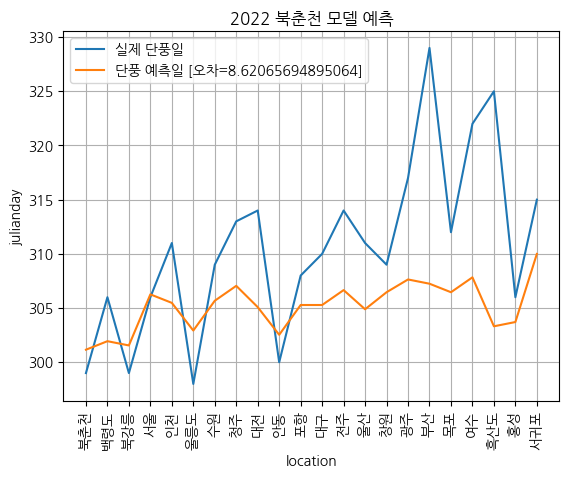

In [38]:
plt.title(f"2022 {area} 모델 예측") 
plt.plot(result.location,result.climax,label = '실제 단풍일')
plt.plot(result.location,result.pred,label=f'단풍 예측일 [오차={np.sqrt(mean_squared_error(pred, y_test))}]')
plt.ylabel('julianday')
plt.xlabel('location')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
# plt.ylim(280,325)
plt.show()